<a href="https://colab.research.google.com/github/BenBlondeel-UCLL/Troy-ML/blob/master/Face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# to install face_recognition library
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566164 sha256=a55114c9dc2f5317644c7ef420bca40ad145a1722ddd310da1d5fc568f306f1a
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [ ]:
#Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#imports
import face_recognition
import cv2
import os
from google.colab.patches import cv2_imshow

Processing Zydrunas_Ilgauskas_0001.jpg
Processing Aaron_Peirsol_0003.jpg


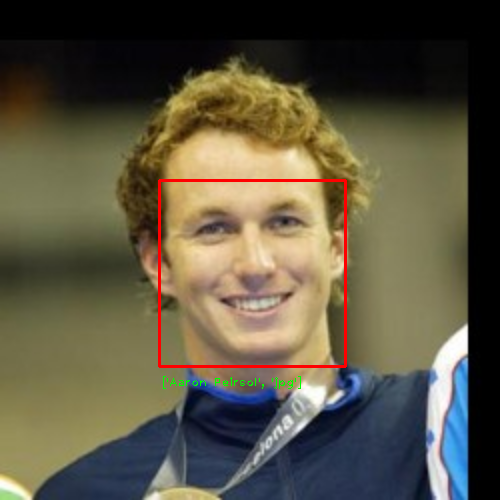

Processing Adam_Scott_0002.jpg


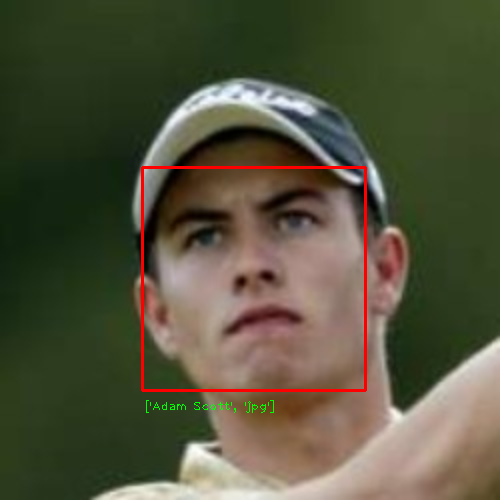

Processing Adam_Sandler_0004.jpg


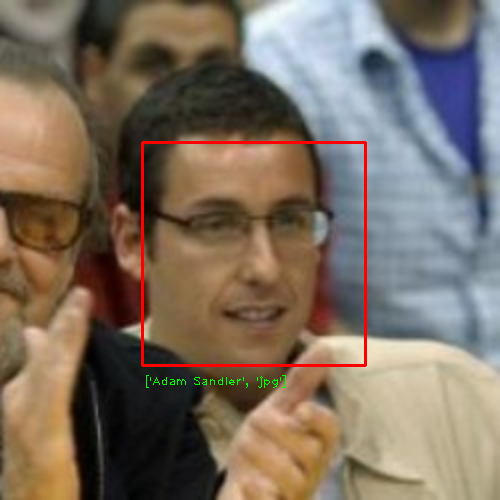

Processing Ben_Affleck_0007.jpg


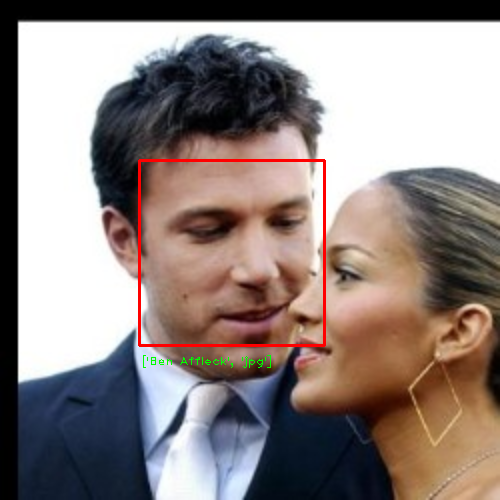

the following are unidentified images: 
Zydrunas_Ilgauskas_0001.jpg
the following people are missing: 
['Mike Pence', 'jpg']
['Donald Trump', 'jpg']


In [24]:
#redeading and resizing images (very important beceause i tried without doing this and got weird results where adam scott didn't get detected)
def read_img(path):
  img = cv2.imread(path)
  (h, w) = img.shape[:2]
  width = 500
  ratio = width / float(w)
  height = int(h * ratio)
  return cv2.resize(img, (width, height))

#encoding our known images
known_encodings = []
known_names = []
known_dir = '/content/drive/My Drive/TroyML/Homework/known'

for file in os.listdir(known_dir):
  img = read_img(os.path.join(known_dir, file))
  img_enc = face_recognition.face_encodings(img)[0]
  known_encodings.append(img_enc)
  known_names.append(file.split('.'))

#encoding unknown faces and comaring the results with the encodings of the known faces
unknown_dir = '/content/drive/My Drive/TroyML/Homework/unknown'
unidentified_imgs = []
identified_imgs = []
for file in os.listdir(unknown_dir):
  print("Processing", file)
  img = read_img(os.path.join(unknown_dir, file))
  img_enc = face_recognition.face_encodings(img)[0]

  results = face_recognition.compare_faces(known_encodings, img_enc)

  #visualizing the results by drawing square in the image with the corresponding name / identified images
  for i in range(len(results)):
    if results[i]:
      name = known_names[i].__str__()
      (top, right, bottom, left) = face_recognition.face_locations(img)[0]
      cv2.rectangle(img, (left, top), (right, bottom), (0, 0, 255), 2)
      cv2.putText(img, name, (left+2, bottom+20), cv2.FONT_HERSHEY_PLAIN, 0.8, (0,255,0),1)
      cv2_imshow(img)
      identified_imgs.append(known_names[i])

  if all(not i for i in results):
    unidentified_imgs.append(file)

#printing unidentified images
print("the following are unidentified images: ")
for unidentified in unidentified_imgs:
  print(unidentified)
print("the following people are missing: ")
for known in known_names:
  if known not in identified_imgs:
    print(known)